## Investment Risk

### Import libraries, functions and classes

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


Bad key axes.color_cycle in file /Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle, line 3 ('axes.color_cycle: 19e7d8, e719ca, 191ce7, 101011, e51919, f0f214, 48f214, 1af033')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
tickers = ['PG','BEI.DE']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t]= wb.DataReader(t, data_source='yahoo', start='2019-1-1')['Adj Close']
    

In [3]:
sec_data.tail()

,PG,BEI.DE
Date,,
2021-02-22,126.580002,84.559998
2021-02-23,127.519997,85.279999
2021-02-24,127.660004,84.900002
2021-02-25,126.580002,84.559998
2021-02-26,123.529999,81.900002


In [4]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [5]:
sec_normalised = sec_data*100 / sec_data.iloc[0]

<AxesSubplot:xlabel='Date'>

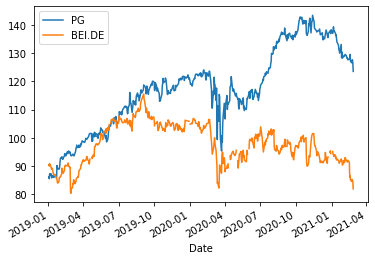

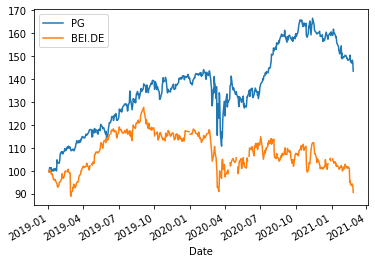

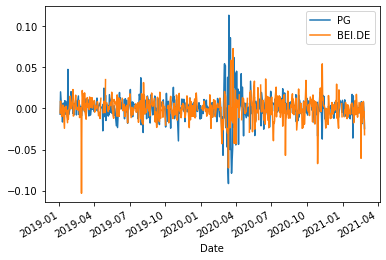

In [6]:
sec_data.plot()
sec_normalised.plot()
sec_returns.plot()

### PG

In [7]:
sec_returns['PG'].mean()

0.0006654976314850592

In [8]:
sec_returns['PG'].mean()*250

0.16637440787126478

In [9]:
sec_returns['PG'].std()

0.01587200324896772

In [10]:
sec_returns['PG'].std()*250**.5

0.2509584064816528

### Beiersdorf

In [11]:
sec_returns['BEI.DE'].mean()

-0.00028702157458277707

In [12]:
sec_returns['BEI.DE'].mean()*250

-0.07175539364569426

In [13]:
sec_returns['BEI.DE'].std()

0.014819013788775877

In [14]:
sec_returns['BEI.DE'].std()*250**.5

0.23430918124986563

### Varaince & Covariance

In [15]:
pg_var = sec_returns['PG'].var()
pg_var

0.00025192048713524185

In [16]:
bei_var = sec_returns['BEI.DE'].var()
bei_var

0.00021960316967192955

In [17]:
pg_var_a = sec_returns['PG'].var() * 250
pg_var_a

0.06298012178381046

In [18]:
bei_var_a = sec_returns['BEI.DE'].var() * 250
bei_var_a

0.05490079241798239

In [19]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000252,0.000078
BEI.DE,0.000078,0.000220


In [20]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.062980,0.019549
BEI.DE,0.019549,0.054901


In [21]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.330354
BEI.DE,0.330354,1.000000


### Calculating Portfolio Risk

#### Equal weighting scheme

In [24]:
weights = np.array([0.5,0.5])

#### Portfolio Variance:

In [26]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.03924471836326704

In [29]:
pfolio_vol = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights)) ** 0.5
pfolio_vol

0.19810279746451598

In [30]:
print(str(round(pfolio_vol, 5) * 100) + ' %')

19.81 %


### Calculating Diversifiable and Non-Diversifable Risk of a Portfolio

In [31]:
weights = np.array([0.5, 0.5])

In [33]:
weights[0]

0.5

In [34]:
weights[1]

0.5

#### Diversifiable Risk

In [36]:
PG_var_a = sec_returns[['PG']].var()*250
PG_var_a

PG    0.06298
dtype: float64

In [37]:
BEI_var_a = sec_returns[['BEI.DE']].var()*250
BEI_var_a

BEI.DE    0.054901
dtype: float64

In [41]:
dr = pfolio_var - (weights[0]**2 * float(PG_var_a)) - (weights[1]**2 * float(BEI_var_a))

In [42]:
dr

0.16863256891406778

### Non-Diversifiable Risk

In [44]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.029470228550448202

In [46]:
n_dr_2 = (weights[0]**2 * float(PG_var_a)) + (weights[1]** 2 * float(BEI_var_a))
n_dr_2

0.029470228550448212